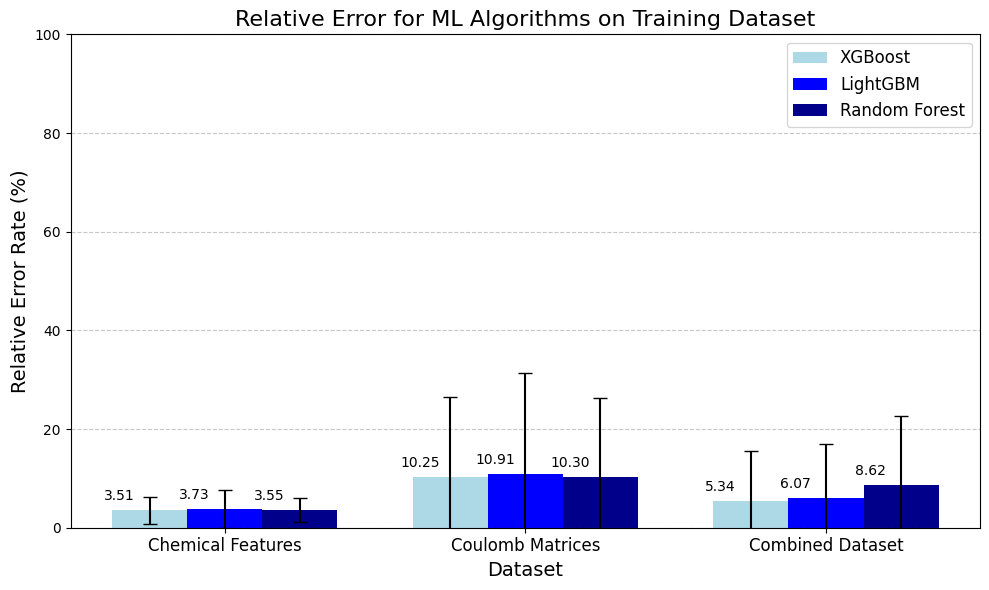

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de la tabla
categories = ['Chemical Features', 'Coulomb Matrices', 'Combined Dataset']
algorithms = ['XGBoost', 'LightGBM', 'Random Forest']
data = {
    'XGBoost': [3.51, 10.25, 5.34],
    'LightGBM': [3.73, 10.91, 6.07],
    'Random Forest': [3.55, 10.3, 8.62]
}
errors = {
    'XGBoost': [2.67, 16.19, 10.15],
    'LightGBM': [3.84, 20.48, 10.80],
    'Random Forest': [2.45, 15.96, 14.05]
}

x = np.arange(len(categories))  # Ubicaciones de las etiquetas
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Gráfica de barras con barras de error
rects1 = ax.bar(x - width, data['XGBoost'], width, yerr=errors['XGBoost'], label='XGBoost', capsize=5, color='lightblue')
rects2 = ax.bar(x, data['LightGBM'], width, yerr=errors['LightGBM'], label='LightGBM', capsize=5, color='blue')
rects3 = ax.bar(x + width, data['Random Forest'], width, yerr=errors['Random Forest'], label='Random Forest', capsize=5, color='darkblue')

# Personalización del gráfico
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_title('Relative Error for ML Algorithms on Training Dataset', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=12)

# Añadir una cuadrícula para facilitar la visualización
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Función para añadir etiquetas de valor al lado de las barras
def autolabel(rects):
    """Agregar una etiqueta de texto al lado de cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() -0.48/ 2, height),
                    xytext=(3, 5),  # Ajustar el desplazamiento de las etiquetas
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

# Llamar a la función para cada conjunto de barras
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()  # Ajustar el diseño para evitar la superposición

plt.show()

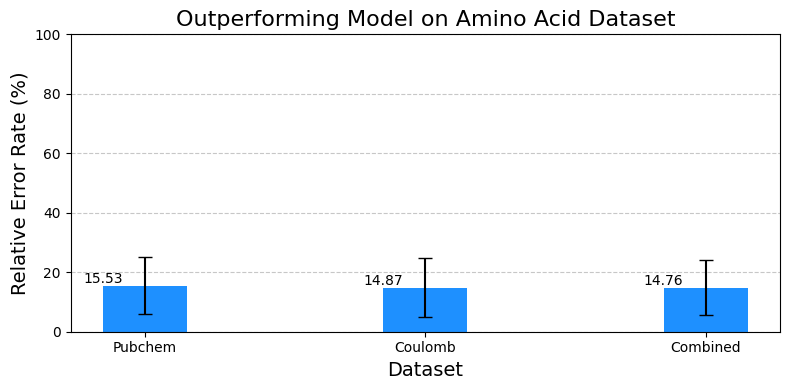

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los nuevos datos proporcionados
data = {
    'Energy Type': ['Ground State Energy', 'Ground State Energy', 'Ground State Energy'],
    'Dataset': ['Pubchem', 'Coulomb', 'Combined'],
    'Relative Error %': [15.53, 14.87, 14.76],
    'Std Dev': [9.52, 9.93, 9.21]
}

df = pd.DataFrame(data)

# Definir los colores para cada tipo de energía
colors = {'Ground State Energy': 'dodgerblue'}

# Graficar un barplot con barras de error
fig, ax = plt.subplots(figsize=(8, 4))

# Graficar cada tipo de energía con barras de error
for i, energy_type in enumerate(df['Energy Type'].unique()):
    subset = df[df['Energy Type'] == energy_type]
    bar_positions = np.arange(len(subset)) + i * 0.35  # Ajustar el espaciado
    bars = ax.bar(bar_positions, subset['Relative Error %'], 
                  yerr=subset['Std Dev'], width=0.3, 
                  label=energy_type, color=colors[energy_type], capsize=5)

    # Agregar etiquetas de valor sobre las barras
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() , yval , f"{yval:.2f}", 
                ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
ax.set_title('Outperforming Model on Amino Acid Dataset', fontsize=16)
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_ylim(0, 100)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_xticks(np.arange(len(df['Dataset'].unique())) + 0.001 / 2)
ax.set_xticklabels(df['Dataset'].unique())
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()